11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


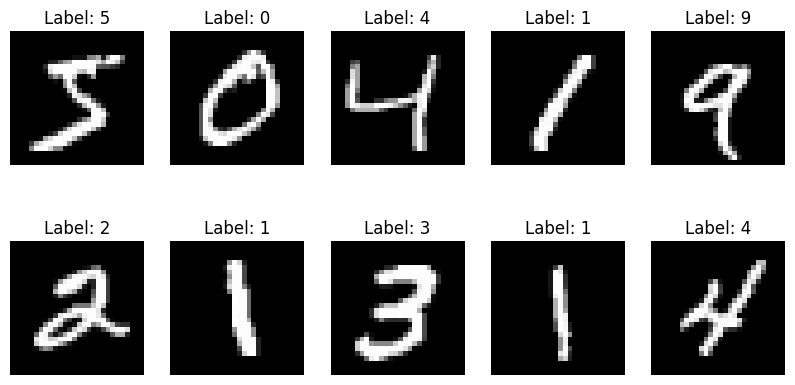

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


# Load dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Normalize images to [0, 1] range
train_images, test_images = train_images / 255.0, test_images / 255.0

# Display some images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

# Build a Neural Network Model

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into 1D array
    keras.layers.Dense(128, activation='relu'),  # Fully connected layer
    keras.layers.Dropout(0.2),  # Dropout for regularization
    keras.layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [ ]:
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8543 - loss: 0.4868 - val_accuracy: 0.9607 - val_loss: 0.1389
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9537 - loss: 0.1552 - val_accuracy: 0.9710 - val_loss: 0.1031
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9675 - loss: 0.1131 - val_accuracy: 0.9746 - val_loss: 0.0860
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9735 - loss: 0.0910 - val_accuracy: 0.9755 - val_loss: 0.0804
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9770 - loss: 0.0751 - val_accuracy: 0.9796 - val_loss: 0.0714


# Make Predictions on New Images

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


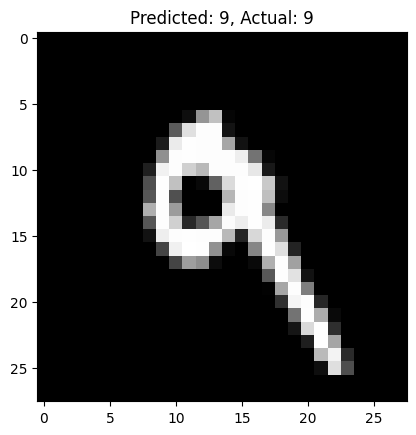

In [ ]:
predictions = model.predict(test_images)

# Show a sample prediction
index = 7
plt.imshow(test_images[index], cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[index])}, Actual: {test_labels[index]}")
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Final Test Accuracy: {test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9796 - loss: 0.0714
Final Test Accuracy: 0.9796


# Improve accuracy by adding batch normalization and more layers.

In [ ]:
# Define improved model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 244,554 (955.29 KB)

 Trainable params: 243,658 (951.79 KB)

 Non-trainable params: 896 (3.50 KB)

#  Train the Improved Model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8329 - loss: 0.5417 - val_accuracy: 0.9596 - val_loss: 0.1294
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9369 - loss: 0.2046 - val_accuracy: 0.9664 - val_loss: 0.1051
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9479 - loss: 0.1702 - val_accuracy: 0.9718 - val_loss: 0.0902
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9552 - loss: 0.1479 - val_accuracy: 0.9735 - val_loss: 0.0829
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9601 - loss: 0.1311 - val_accuracy: 0.9753 - val_loss: 0.0820
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9642 - loss: 0.1152 - val_accuracy: 0.9749 - val_loss: 0.0812
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9660 - loss: 0.1108 - val_accuracy: 0.9792 - val_loss: 0.0688
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9691 - loss: 0

# Generate Accuracy Report
Plot Training vs. Validation Accuracy & Loss

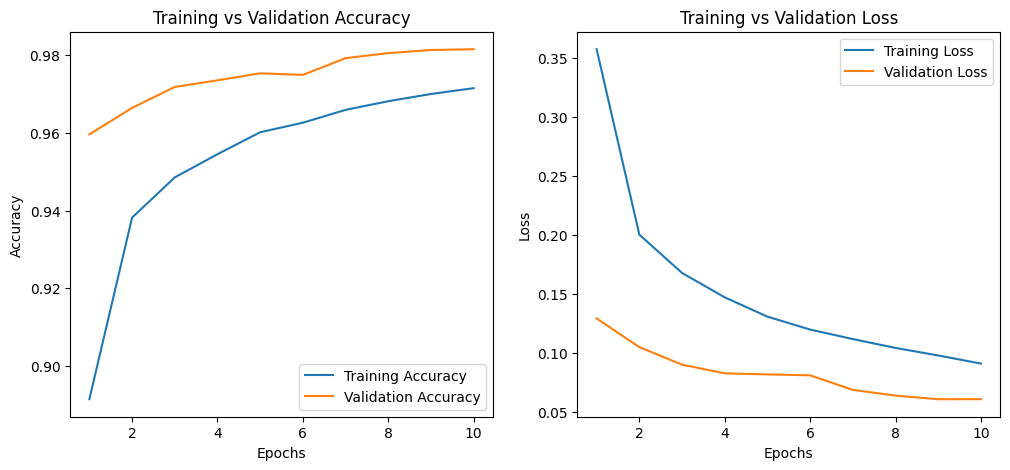

In [ ]:
# Extract history data
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()

# Evaluate Final Model Accuracy

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Final Test Accuracy: {test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9815 - loss: 0.0610
Final Test Accuracy: 0.9815


# Hyperparameter Tuning for MNIST Classification
Hyperparameter tuning can further boost accuracy and reduce loss.

In [ ]:
!pip install keras-tuner

# Automated Hyperparameter Tuning with Keras Tuner

In [ ]:
import keras_tuner as kt
# Define Search Space for Hyperparameters

def build_model(hp):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(hp.Int('units_1', min_value=128, max_value=512, step=128), activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(hp.Float('dropout_1', 0.2, 0.5, step=0.1)),

        keras.layers.Dense(hp.Int('units_2', min_value=64, max_value=256, step=64), activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(hp.Float('dropout_2', 0.2, 0.5, step=0.1)),

        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [0.1, 0.01, 0.001, 0.0005])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


# Run the Hyperparameter Search

In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Try 10 different hyperparameter sets
    directory='mnist_tuning',
    project_name='mnist'
)

tuner.search(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Get best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best Hyperparameters: \n"
      f"  Units (Layer 1): {best_hps.get('units_1')}\n"
      f"  Units (Layer 2): {best_hps.get('units_2')}\n"
      f"  Dropout (Layer 1): {best_hps.get('dropout_1')}\n"
      f"  Dropout (Layer 2): {best_hps.get('dropout_2')}\n"
      f"  Learning Rate: {best_hps.get('learning_rate')}")


Trial 5 Complete [00h 03m 21s]
val_accuracy: 0.9835000038146973

Best val_accuracy So Far: 0.9835000038146973
Total elapsed time: 00h 16m 19s
Best Hyperparameters: 
  Units (Layer 1): 384
  Units (Layer 2): 256
  Dropout (Layer 1): 0.4
  Dropout (Layer 2): 0.2
  Learning Rate: 0.0005
